# BitCoin Price Prediction - Data Collection
### Countries Economic Situations

Datas start date: 
- 2017-01-01 

Datas end date:
- 2021-06-01


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start = '2017-01-01'
end = '2021-6-1'
startdate = pd.to_datetime(start).date()
enddate = pd.to_datetime(end).date()

In [3]:
df_btc = yf.download('BTC-USD', startdate, enddate, auto_adjust=True,interval='1d')

[*********************100%***********************]  1 of 1 completed


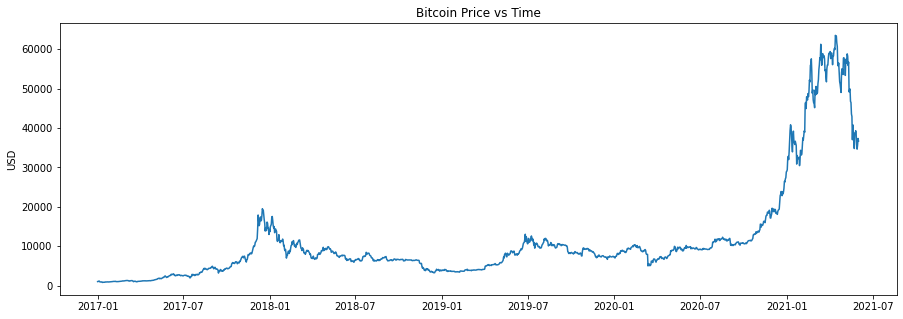

In [4]:
plt.figure(figsize=(15,5));
plt.title('Bitcoin Price vs Time');
plt.plot(df_btc.index,df_btc['Close']);
plt.ylabel('USD');

### Gold price

[*********************100%***********************]  1 of 1 completed


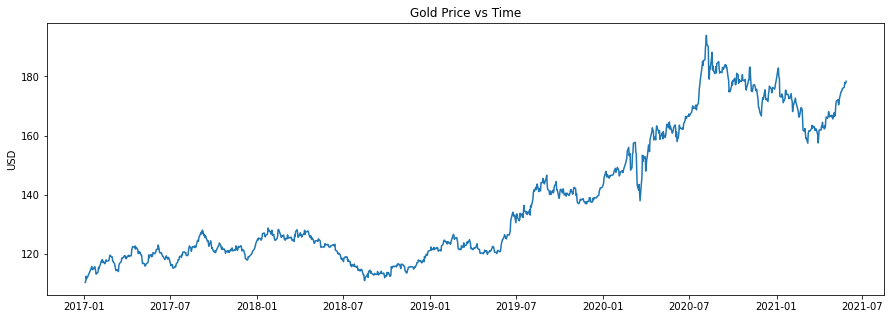

In [5]:
df_gold = yf.download('GLD', startdate, enddate, auto_adjust=True);

df_gold = df_gold[['Close']]

plt.figure(figsize=(15,5));
plt.title('Gold Price vs Time');
plt.plot(df_gold.index,df_gold['Close']);
plt.ylabel('USD');

In [6]:
df_gold.head(10)

,Close
Date,
2017-01-03,110.470001
2017-01-04,110.860001
2017-01-05,112.580002
2017-01-06,111.750000
2017-01-09,112.669998
2017-01-10,113.150002
2017-01-11,113.500000
2017-01-12,113.910004
2017-01-13,114.209999


### 10-Year Treasury Minus 2-Year Treasury
Source: https://fred.stlouisfed.org/series/T10Y2Y

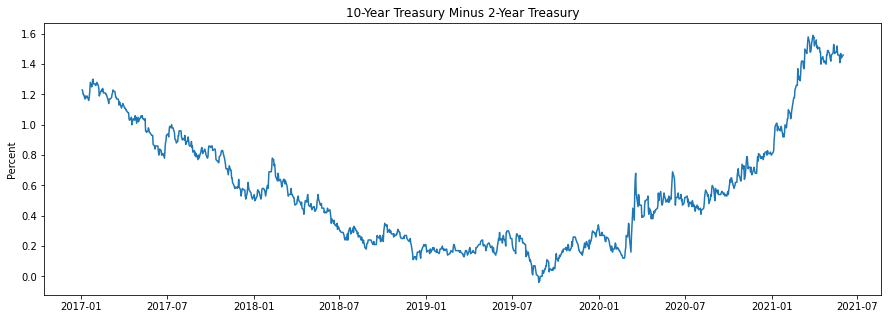

In [17]:
df_treasury_dif = pd.read_csv('data/T10Y2Y.csv')

df_treasury_dif.index = pd.to_datetime(df_treasury_dif['DATE'])
df_treasury_dif.sort_index(inplace=True)
df_treasury_dif.drop(columns = ['DATE'],inplace=True)

# Drop all the empty value
df_treasury_dif = df_treasury_dif[df_treasury_dif['T10Y2Y']!='.']

# Turn value from string to float
df_treasury_dif['T10Y2Y'] = pd.to_numeric(df_treasury_dif['T10Y2Y'])
df_treasury_dif = df_treasury_dif[startdate:enddate]

plt.figure(figsize=(15,5));
plt.title('10-Year Treasury Minus 2-Year Treasury');
plt.plot(df_treasury_dif.index,df_treasury_dif['T10Y2Y']);
plt.ylabel('Percent');

### Volatility Index

[*********************100%***********************]  1 of 1 completed


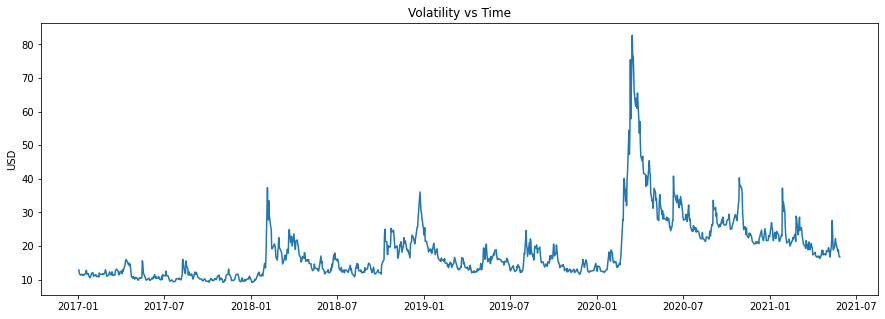

In [8]:
df_vol = yf.download('^VIX', startdate, enddate, auto_adjust=True);

df_vol = df_vol[['Close']]

plt.figure(figsize=(15,5));
plt.title('Volatility vs Time');
plt.plot(df_vol.index,df_vol['Close']);
plt.ylabel('USD');

## S&P 500

[*********************100%***********************]  1 of 1 completed


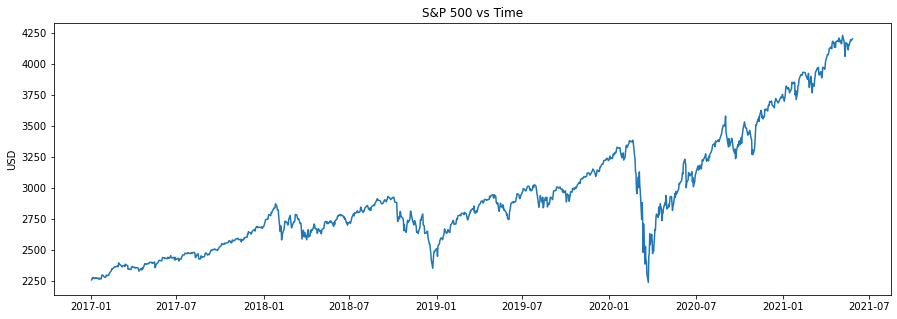

In [9]:
df_sp500 = yf.download('^GSPC', startdate, enddate, auto_adjust=True);

df_sp500 = df_sp500[['Close']]

plt.figure(figsize=(15,5));
plt.title('S&P 500 vs Time');
plt.plot(df_sp500.index,df_sp500['Close']);
plt.ylabel('USD');

### Power of media

### Google Trend
Source: Google Trend

gtrend function downloaded from https://github.com/qztseng/google-trends-daily/blob/master/google%20Trend%20daily%20data%20for%20Brexit.ipynb

Fetching 'Cryptocurrency' for period:2020-09-05 2021-06-01
Fetching 'Cryptocurrency' for period:2020-03-20 2020-12-14
Normalize by overlapping period:2020-09-05 2020-12-14
Fetching 'Cryptocurrency' for period:2019-10-03 2020-06-28
Normalize by overlapping period:2020-03-20 2020-06-28
Fetching 'Cryptocurrency' for period:2019-04-17 2020-01-11
Normalize by overlapping period:2019-10-03 2020-01-11
Fetching 'Cryptocurrency' for period:2018-10-30 2019-07-26
Normalize by overlapping period:2019-04-17 2019-07-26
Fetching 'Cryptocurrency' for period:2018-05-14 2019-02-07
Normalize by overlapping period:2018-10-30 2019-02-07
Fetching 'Cryptocurrency' for period:2017-11-26 2018-08-22
Normalize by overlapping period:2018-05-14 2018-08-22
Fetching 'Cryptocurrency' for period:2017-06-10 2018-03-06
Normalize by overlapping period:2017-11-26 2018-03-06
Fetching 'Cryptocurrency' for period:2016-12-23 2017-09-18
Normalize by overlapping period:2017-06-10 2017-09-18
Fetching 'Cryptocurrency' for period:

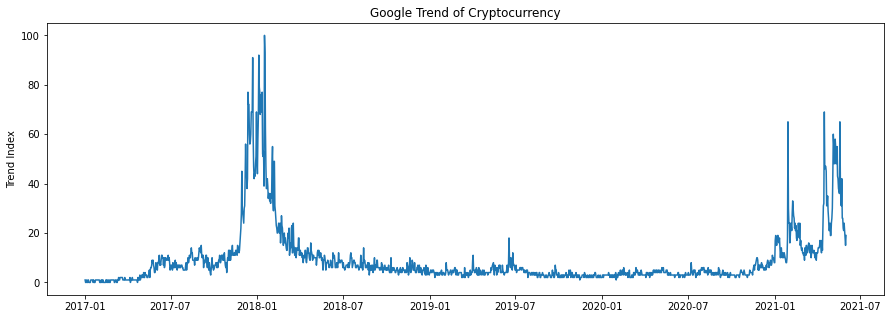

In [10]:
from pytrends.request import TrendReq
import gtrend

pytrend = TrendReq(hl='en-US')
keyword = 'Cryptocurrency'
geo='US'
cat=0
gprop=''

df_google_trend = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)
df_google_trend.drop(columns=['overlap'],inplace=True)
df_google_trend.rename(columns={'Cryptocurrency':'trend_index'},inplace=True)
plt.figure(figsize=(15,5));
plt.title('Google Trend of Cryptocurrency');
plt.plot(df_google_trend.index,df_google_trend['trend_index']);
plt.ylabel('Trend Index');

### Reddit web scrape
Pushshift API aggregate function temporarily disabled due to slow cluster time. 

This feature will be added when the aggregate function is enabled.

### Cost of Mining
- Block Details
    - Average Block Size (30 Day Avg)
- Mining Information
    - Total Hash Rate (TH/s) (7 Day Avg)
- Network Activity
    - Transactions Per Day (7 Day Avg)
    - Mempool Size (Bytes) (30 Day Avg)
    
    
All data are collected from blockchain.com

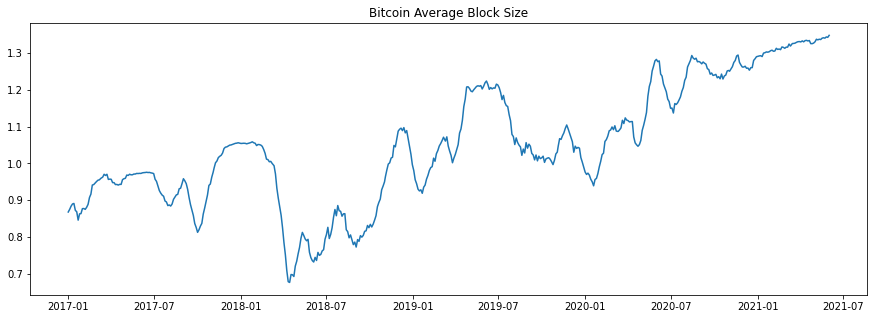

In [11]:
# Average Block Size
df_btc_blocksize = pd.read_csv('data/avg-block-size.csv')

df_btc_blocksize.index = pd.to_datetime(df_btc_blocksize['Timestamp']).dt.date
df_btc_blocksize.sort_index(inplace=True)
df_btc_blocksize.drop(columns = ['Timestamp'],inplace=True)
df_btc_blocksize = df_btc_blocksize[startdate:enddate]

plt.figure(figsize=(15,5));
plt.title('Bitcoin Average Block Size');
plt.plot(df_btc_blocksize.index,df_btc_blocksize['avg-block-size']);

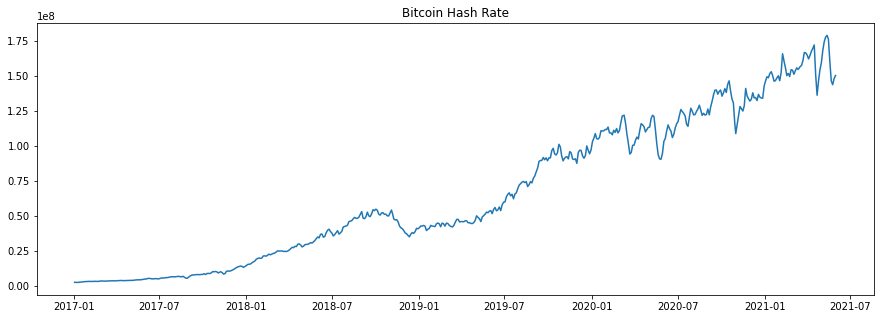

In [12]:
# Total Hash Rate
df_btc_hashrate = pd.read_csv('data/hash-rate.csv')

df_btc_hashrate.index = pd.to_datetime(df_btc_hashrate['Timestamp']).dt.date
df_btc_hashrate.sort_index(inplace=True)
df_btc_hashrate.drop(columns = ['Timestamp'],inplace=True)
df_btc_hashrate = df_btc_hashrate[startdate:enddate]

plt.figure(figsize=(15,5));
plt.title('Bitcoin Hash Rate');
plt.plot(df_btc_hashrate.index,df_btc_hashrate['hash-rate']);

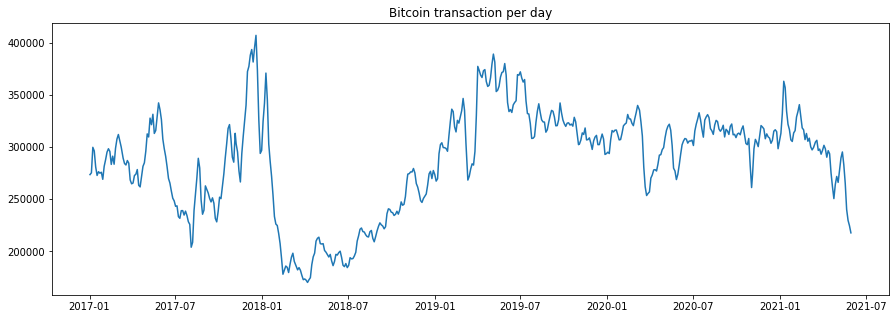

In [13]:
# Transactions Per Day
df_btc_trans = pd.read_csv('data/n-transactions.csv')

df_btc_trans.index = pd.to_datetime(df_btc_trans['Timestamp']).dt.date
df_btc_trans.sort_index(inplace=True)
df_btc_trans.drop(columns = ['Timestamp'],inplace=True)
df_btc_trans = df_btc_trans[startdate:enddate]

plt.figure(figsize=(15,5));
plt.title('Bitcoin transaction per day');
plt.plot(df_btc_trans.index,df_btc_trans['n-transactions']);

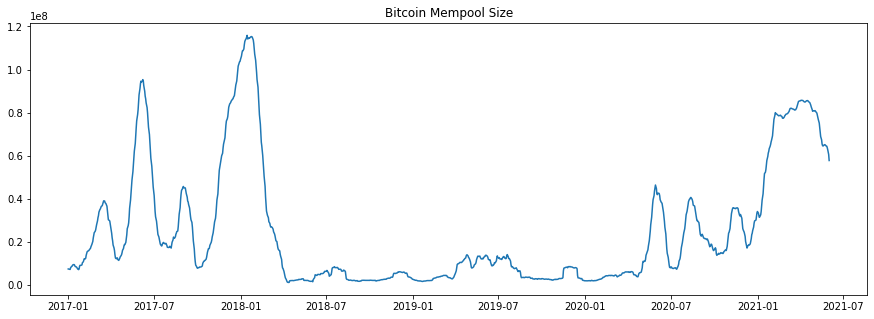

In [14]:
# Mempool Size
df_btc_mempool = pd.read_csv('data/mempool-size.csv')

df_btc_mempool.index = pd.to_datetime(df_btc_mempool['Timestamp']).dt.date
df_btc_mempool.sort_index(inplace=True)
df_btc_mempool.drop(columns = ['Timestamp'],inplace=True)
df_btc_mempool = df_btc_mempool[startdate:enddate]

plt.figure(figsize=(15,5));
plt.title('Bitcoin Mempool Size');
plt.plot(df_btc_mempool.index,df_btc_mempool['mempool-size']);

### Compile all data into one df

In [16]:
df_combine = df_btc[['Close']].rename(columns={'Close':'BTC_price'}).copy()
df_combine['gold_price'] = df_gold
df_combine['treasury_10y2y'] = df_treasury_dif
df_combine['volatility'] = df_vol
df_combine['sp500'] = df_sp500
df_combine['goog_trend'] = df_google_trend
df_combine['block_size'] = df_btc_blocksize
df_combine['hash_rate'] = df_btc_hashrate
df_combine['transaction'] = df_btc_trans
df_combine['mempool'] = df_btc_mempool

# There are some nan values because the time frequency of each dataset are different
# Use interpolate method to fill the gap with a straight line 
df_combine.interpolate(method='time',inplace=True)

# Since there is not data of mempool before 2016-07-14, I manually set all the value to 400000
df_combine['mempool'].fillna(4000000,inplace=True)

df_combine.dropna(inplace=True)

# Save the df
df_combine.to_csv('data/combine_data.csv',index=True)

In [19]:
df_combine.head(10)

,BTC_price,gold_price,treasury_10y2y,volatility,sp500,goog_trend,block_size,hash_rate,transaction,mempool
Date,,,,,,,,,,
2017-01-03,1043.839966,110.470001,1.23,12.85,2257.830078,0.0,0.872457,2.479403e+06,274168.047619,7.422547e+06
2017-01-04,1154.729980,110.860001,1.22,11.85,2270.750000,1.0,0.874868,2.467371e+06,274751.952381,7.396877e+06
2017-01-05,1013.380005,112.580002,1.20,11.67,2269.000000,0.0,0.877742,2.455338e+06,275335.857143,7.326382e+06
2017-01-06,902.200989,111.750000,1.20,11.32,2276.979980,0.0,0.880615,2.443306e+06,283477.428571,8.111156e+06
2017-01-07,908.585022,112.056666,1.19,11.40,2274.286621,1.0,0.883489,2.426762e+06,291619.000000,8.401917e+06
2017-01-08,911.198975,112.363332,1.18,11.48,2271.593262,1.0,0.885492,2.410217e+06,299760.571429,8.692677e+06
2017-01-09,902.828003,112.669998,1.17,11.56,2268.899902,0.0,0.887496,2.393673e+06,298600.380952,8.815441e+06
2017-01-10,907.679016,113.150002,1.19,11.49,2268.899902,0.0,0.889499,2.436831e+06,297440.190476,9.202789e+06
2017-01-11,777.757019,113.500000,1.18,11.26,2275.320068,0.0,0.889973,2.479989e+06,296280.000000,9.484986e+06
